In [ ]:
import pandas as pd
import numpy as np


# **Trasnforación de los datos a un DataFrame**



Datos obtenidos de la API CoinGecko, en el endpoint coins / market. Ordenado en una lista de 50 elementos en total, de mayor a menor de las monedas con mejor capitalización del mercado.
La capitalización del mercado es el valor total de una moneda crypto. Calculado multiplicando su precio actual por el total de monedas, cantidad, en circulación.

In [ ]:
df = pd.read_csv('crypto_data.csv')
df

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,sparkline_in_7d
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,29395.000000,572042278196,1,6.175228e+11,12397781655,29665.000000,...,2.100000e+07,69045.000000,-57.38273,2021-11-10T14:24:11.849Z,6.781000e+01,4.329393e+04,2013-07-06T00:00:00.000Z,NaN,2023-08-10T17:06:14.757Z,"{'price': [29107.671411490628, 29068.721666552..."
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1849.280000,222283221202,2,2.222832e+11,4521458259,1862.320000,...,NaN,4878.260000,-62.06329,2021-11-10T14:24:19.604Z,4.329790e-01,4.273231e+05,2015-10-20T00:00:00.000Z,"{'times': 83.10411741166017, 'currency': 'btc'...",2023-08-10T17:06:16.524Z,"{'price': [1835.434047268587, 1832.99564635555..."
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.998895,83467476037,3,8.346748e+10,11408577084,1.001000,...,NaN,1.320000,-24.47888,2018-07-24T00:00:00.000Z,5.725210e-01,7.452922e+01,2015-03-02T00:00:00.000Z,NaN,2023-08-10T17:05:00.593Z,"{'price': [0.9985973377492344, 0.9988236463582..."
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,241.440000,37192055025,4,4.834653e+10,358506813,244.090000,...,2.000000e+08,686.310000,-64.75927,2021-05-10T07:24:17.097Z,3.981770e-02,6.073170e+05,2017-10-19T00:00:00.000Z,NaN,2023-08-10T17:06:19.250Z,"{'price': [239.93577006767683, 241.06842719410..."
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.627339,33136267060,5,6.282795e+10,1389013185,0.661595,...,1.000000e+11,3.400000,-81.50970,2018-01-07T00:00:00.000Z,2.686210e-03,2.329297e+04,2014-05-22T00:00:00.000Z,NaN,2023-08-10T17:06:21.755Z,"{'price': [0.6646590174706093, 0.6598367519733..."
5,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,0.999786,26148693807,6,2.616628e+10,3209111405,1.002000,...,NaN,1.170000,-14.72911,2019-05-08T00:40:28.300Z,8.776470e-01,1.393846e+01,2023-03-11T08:02:13.981Z,NaN,2023-08-10T17:06:16.598Z,"{'price': [0.9997720078633543, 1.0003482890480..."
6,staked-ether,steth,Lido Staked Ether,https://assets.coingecko.com/coins/images/1344...,1848.710000,14858580701,7,1.485858e+10,25882129,1862.570000,...,8.035959e+06,4829.570000,-61.71489,2021-11-10T14:40:47.256Z,4.829000e+02,2.828993e+02,2020-12-22T04:08:21.854Z,NaN,2023-08-10T17:06:13.431Z,"{'price': [1834.310586074048, 1831.74187811960..."
7,dogecoin,doge,Dogecoin,https://assets.coingecko.com/coins/images/5/la...,0.076452,10763287574,8,1.076328e+10,447717324,0.076751,...,NaN,0.731578,-89.52554,2021-05-08T05:08:23.458Z,8.690000e-05,8.807670e+04,2015-05-06T00:00:00.000Z,NaN,2023-08-10T17:06:20.880Z,"{'price': [0.07354484570972675, 0.073241393792..."
8,cardano,ada,Cardano,https://assets.coingecko.com/coins/images/975/...,0.297079,10424044668,9,1.338513e+10,191761831,0.301925,...,4.500000e+10,3.090000,-90.35807,2021-09-02T06:00:10.474Z,1.925275e-02,1.445949e+03,2020-03-13T02:22:55.044Z,NaN,2023-08-10T17:06:19.388Z,"{'price': [0.2954957861121425, 0.2935046484013..."
9,solana,sol,Solana,https://assets.coingecko.com/coins/images/4128...,24.480000,9939478657,10,1.358750e+10,362620658,24.780000,...,NaN,259.960000,-90.57375,2021-11-06T21:54:35.825Z,5.008010e-01,4.793040e+03,2020-05-11T19:35:23.449Z,NaN,2023-08-10T17:06:13.136Z,"{'price': [22.755742859519184, 22.632235349524..."


In [ ]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [ ]:
df.isnull().sum()

id                                   0
symbol                               0
name                                 0
image                                0
current_price                        0
market_cap                           0
market_cap_rank                      0
fully_diluted_valuation              2
total_volume                         0
high_24h                             0
low_24h                              0
price_change_24h                     0
price_change_percentage_24h          0
market_cap_change_24h                0
market_cap_change_percentage_24h     0
circulating_supply                   0
total_supply                         2
max_supply                          21
ath                                  0
ath_change_percentage                0
ath_date                             0
atl                                  0
atl_change_percentage                0
atl_date                             0
roi                                 40
last_updated             

Por falta de datos, elimino la columna 'roi'. Ya que no será utilizada para el análisis.

In [ ]:
df = df.drop(columns=['roi'])


# **Explicación de la información que proveen las columnas**

In [ ]:
df.columns

Index(['id', 'symbol', 'name', 'image', 'current_price', 'market_cap',
       'market_cap_rank', 'fully_diluted_valuation', 'total_volume',
       'high_24h', 'low_24h', 'price_change_24h',
       'price_change_percentage_24h', 'market_cap_change_24h',
       'market_cap_change_percentage_24h', 'circulating_supply',
       'total_supply', 'max_supply', 'ath', 'ath_change_percentage',
       'ath_date', 'atl', 'atl_change_percentage', 'atl_date', 'last_updated',
       'sparkline_in_7d'],
      dtype='object')

**market_cap:** La capitalización del mercado actual, calculado precio por
circulating_supply.

**market_cap_rank:** Ranking según market_cap.

**fully_diluted_valuation:** Total valuación si todos los tokens/monedas estuvieran en circulación en su precio más alto.

**total_volume:** Volumen total de intercambio de la moneda en las últimas 24 hrs.

**high_24:** Precio más alto de la moneda en las últimas 24 hrs.

**low_24**: Precio más bajo de la moneda en las últimas 24 hrs.




**price_change_24h:** Cambio del precio de la moneda en las últimas 24 hrs.

**price_change_percentage_24h:** Cambio del precio de la moneda en porcentaje, en las últimas 24 hrs.

**circulating_supply:** Número total de unidades de la moneda en circulación actual.

**total_supply:** Número total de unidades de la moneda que podrá ser creada.

**max_supply:** Máximo de unidades de la moneda que podrá existir.

**ath:** El precio más alto que ha alcanzado la moneda.

**ath_change_percentage:** Cambio de porcentaje precio actual sobre el ath.

**ath_date:** Fecha y hora en donde la moneda ha alcanzado su ath.

**atl:** El precio más bajo que ha alcanzado la moneda.

**sparkline_in_7d:** Muestro sobre el flujo del precio en los últimos 7 días.

# **Ordenar por market_cap_rank.**

In [ ]:
top_ten = df.sort_values(by='market_cap_rank').head(10)
top_ten

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,last_updated,sparkline_in_7d
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,29395.000000,572042278196,1,6.175228e+11,12397781655,29665.000000,...,2.100000e+07,2.100000e+07,69045.000000,-57.38273,2021-11-10T14:24:11.849Z,67.810000,43293.93447,2013-07-06T00:00:00.000Z,2023-08-10T17:06:14.757Z,"{'price': [29107.671411490628, 29068.721666552..."
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1849.280000,222283221202,2,2.222832e+11,4521458259,1862.320000,...,1.201525e+08,NaN,4878.260000,-62.06329,2021-11-10T14:24:19.604Z,0.432979,427323.06592,2015-10-20T00:00:00.000Z,2023-08-10T17:06:16.524Z,"{'price': [1835.434047268587, 1832.99564635555..."
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.998895,83467476037,3,8.346748e+10,11408577084,1.001000,...,8.353293e+10,NaN,1.320000,-24.47888,2018-07-24T00:00:00.000Z,0.572521,74.52922,2015-03-02T00:00:00.000Z,2023-08-10T17:05:00.593Z,"{'price': [0.9985973377492344, 0.9988236463582..."
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,241.440000,37192055025,4,4.834653e+10,358506813,244.090000,...,1.538562e+08,2.000000e+08,686.310000,-64.75927,2021-05-10T07:24:17.097Z,0.039818,607317.02075,2017-10-19T00:00:00.000Z,2023-08-10T17:06:19.250Z,"{'price': [239.93577006767683, 241.06842719410..."
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.627339,33136267060,5,6.282795e+10,1389013185,0.661595,...,9.998854e+10,1.000000e+11,3.400000,-81.50970,2018-01-07T00:00:00.000Z,0.002686,23292.96809,2014-05-22T00:00:00.000Z,2023-08-10T17:06:21.755Z,"{'price': [0.6646590174706093, 0.6598367519733..."
5,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,0.999786,26148693807,6,2.616628e+10,3209111405,1.002000,...,2.616689e+10,NaN,1.170000,-14.72911,2019-05-08T00:40:28.300Z,0.877647,13.93846,2023-03-11T08:02:13.981Z,2023-08-10T17:06:16.598Z,"{'price': [0.9997720078633543, 1.0003482890480..."
6,staked-ether,steth,Lido Staked Ether,https://assets.coingecko.com/coins/images/1344...,1848.710000,14858580701,7,1.485858e+10,25882129,1862.570000,...,8.035959e+06,8.035959e+06,4829.570000,-61.71489,2021-11-10T14:40:47.256Z,482.900000,282.89933,2020-12-22T04:08:21.854Z,2023-08-10T17:06:13.431Z,"{'price': [1834.310586074048, 1831.74187811960..."
7,dogecoin,doge,Dogecoin,https://assets.coingecko.com/coins/images/5/la...,0.076452,10763287574,8,1.076328e+10,447717324,0.076751,...,1.405349e+11,NaN,0.731578,-89.52554,2021-05-08T05:08:23.458Z,0.000087,88076.70429,2015-05-06T00:00:00.000Z,2023-08-10T17:06:20.880Z,"{'price': [0.07354484570972675, 0.073241393792..."
8,cardano,ada,Cardano,https://assets.coingecko.com/coins/images/975/...,0.297079,10424044668,9,1.338513e+10,191761831,0.301925,...,4.500000e+10,4.500000e+10,3.090000,-90.35807,2021-09-02T06:00:10.474Z,0.019253,1445.94948,2020-03-13T02:22:55.044Z,2023-08-10T17:06:19.388Z,"{'price': [0.2954957861121425, 0.2935046484013..."
9,solana,sol,Solana,https://assets.coingecko.com/coins/images/4128...,24.480000,9939478657,10,1.358750e+10,362620658,24.780000,...,5.545787e+08,NaN,259.960000,-90.57375,2021-11-06T21:54:35.825Z,0.500801,4793.04024,2020-05-11T19:35:23.449Z,2023-08-10T17:06:13.136Z,"{'price': [22.755742859519184, 22.632235349524..."


# **Ver la fecha y hora donde cada moneda haya alcanzado su máximo precio en 2023.**

In [ ]:
ath_2023 = df[df['ath_date'].str.startswith('2023')]
ath_2023[['name', 'ath_date']]

,name,ath_date
26,OKB,2023-02-18T01:21:37.582Z
34,Aptos,2023-01-26T14:25:17.390Z
36,Mantle,2023-07-20T22:39:30.228Z
37,Arbitrum,2023-03-23T13:10:03.106Z
41,Optimism,2023-02-24T20:20:00.509Z
47,Kaspa,2023-08-06T12:10:40.416Z


# **Ver la fecha y hora donde cada moneda haya alcanzado su mínimo precio en 2023.**

In [ ]:
atl_2023= df[df['atl_date'].str.startswith('2023')]
atl_2023[['name', 'atl_date']]

,name,atl_date
5,USD Coin,2023-03-11T08:02:13.981Z
21,Dai,2023-03-11T07:50:50.514Z
36,Mantle,2023-08-08T23:34:42.573Z
37,Arbitrum,2023-06-15T07:25:14.752Z
48,Algorand,2023-06-10T04:31:46.997Z


#**Revisar en profundidad las 10 monedas en el top rank según capitalización del mercado.**

In [ ]:
top_ten.sort_values(by='current_price')

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,last_updated,sparkline_in_7d
7,dogecoin,doge,Dogecoin,https://assets.coingecko.com/coins/images/5/la...,0.076452,10763287574,8,1.076328e+10,447717324,0.076751,...,1.405349e+11,NaN,0.731578,-89.52554,2021-05-08T05:08:23.458Z,0.000087,88076.70429,2015-05-06T00:00:00.000Z,2023-08-10T17:06:20.880Z,"{'price': [0.07354484570972675, 0.073241393792..."
8,cardano,ada,Cardano,https://assets.coingecko.com/coins/images/975/...,0.297079,10424044668,9,1.338513e+10,191761831,0.301925,...,4.500000e+10,4.500000e+10,3.090000,-90.35807,2021-09-02T06:00:10.474Z,0.019253,1445.94948,2020-03-13T02:22:55.044Z,2023-08-10T17:06:19.388Z,"{'price': [0.2954957861121425, 0.2935046484013..."
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.627339,33136267060,5,6.282795e+10,1389013185,0.661595,...,9.998854e+10,1.000000e+11,3.400000,-81.50970,2018-01-07T00:00:00.000Z,0.002686,23292.96809,2014-05-22T00:00:00.000Z,2023-08-10T17:06:21.755Z,"{'price': [0.6646590174706093, 0.6598367519733..."
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.998895,83467476037,3,8.346748e+10,11408577084,1.001000,...,8.353293e+10,NaN,1.320000,-24.47888,2018-07-24T00:00:00.000Z,0.572521,74.52922,2015-03-02T00:00:00.000Z,2023-08-10T17:05:00.593Z,"{'price': [0.9985973377492344, 0.9988236463582..."
5,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,0.999786,26148693807,6,2.616628e+10,3209111405,1.002000,...,2.616689e+10,NaN,1.170000,-14.72911,2019-05-08T00:40:28.300Z,0.877647,13.93846,2023-03-11T08:02:13.981Z,2023-08-10T17:06:16.598Z,"{'price': [0.9997720078633543, 1.0003482890480..."
9,solana,sol,Solana,https://assets.coingecko.com/coins/images/4128...,24.480000,9939478657,10,1.358750e+10,362620658,24.780000,...,5.545787e+08,NaN,259.960000,-90.57375,2021-11-06T21:54:35.825Z,0.500801,4793.04024,2020-05-11T19:35:23.449Z,2023-08-10T17:06:13.136Z,"{'price': [22.755742859519184, 22.632235349524..."
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,241.440000,37192055025,4,4.834653e+10,358506813,244.090000,...,1.538562e+08,2.000000e+08,686.310000,-64.75927,2021-05-10T07:24:17.097Z,0.039818,607317.02075,2017-10-19T00:00:00.000Z,2023-08-10T17:06:19.250Z,"{'price': [239.93577006767683, 241.06842719410..."
6,staked-ether,steth,Lido Staked Ether,https://assets.coingecko.com/coins/images/1344...,1848.710000,14858580701,7,1.485858e+10,25882129,1862.570000,...,8.035959e+06,8.035959e+06,4829.570000,-61.71489,2021-11-10T14:40:47.256Z,482.900000,282.89933,2020-12-22T04:08:21.854Z,2023-08-10T17:06:13.431Z,"{'price': [1834.310586074048, 1831.74187811960..."
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1849.280000,222283221202,2,2.222832e+11,4521458259,1862.320000,...,1.201525e+08,NaN,4878.260000,-62.06329,2021-11-10T14:24:19.604Z,0.432979,427323.06592,2015-10-20T00:00:00.000Z,2023-08-10T17:06:16.524Z,"{'price': [1835.434047268587, 1832.99564635555..."
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,29395.000000,572042278196,1,6.175228e+11,12397781655,29665.000000,...,2.100000e+07,2.100000e+07,69045.000000,-57.38273,2021-11-10T14:24:11.849Z,67.810000,43293.93447,2013-07-06T00:00:00.000Z,2023-08-10T17:06:14.757Z,"{'price': [29107.671411490628, 29068.721666552..."


# **Comparación entre las monedas con respecto al precio mayor alcanzado.**

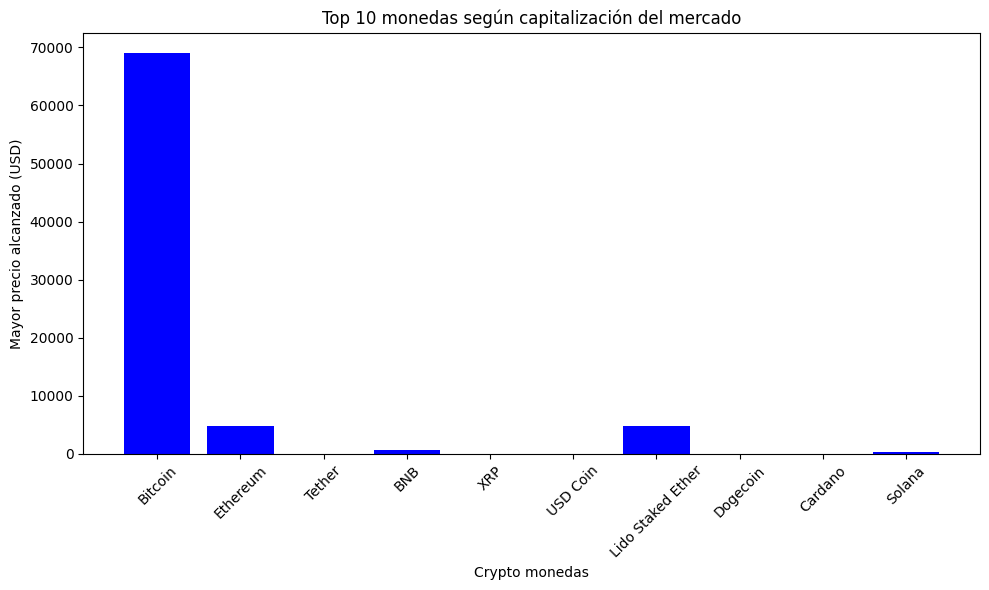

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_ten['name'], top_ten['ath'], color='blue')
plt.xlabel('Crypto monedas')
plt.ylabel('Mayor precio alcanzado (USD)')
plt.title('Top 10 monedas según capitalización del mercado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Comparación entre las monedas con respecto al precio menor alcanzado.**

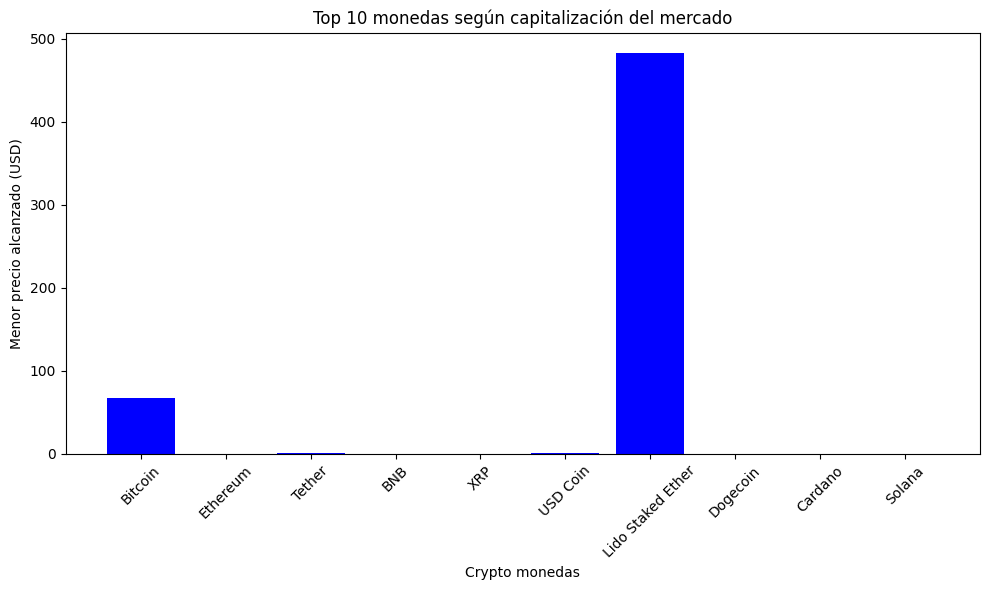

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_ten['name'], top_ten['atl'], color='blue')
plt.xlabel('Crypto monedas')
plt.ylabel('Menor precio alcanzado (USD)')
plt.title('Top 10 monedas según capitalización del mercado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Comparación del precio actual**

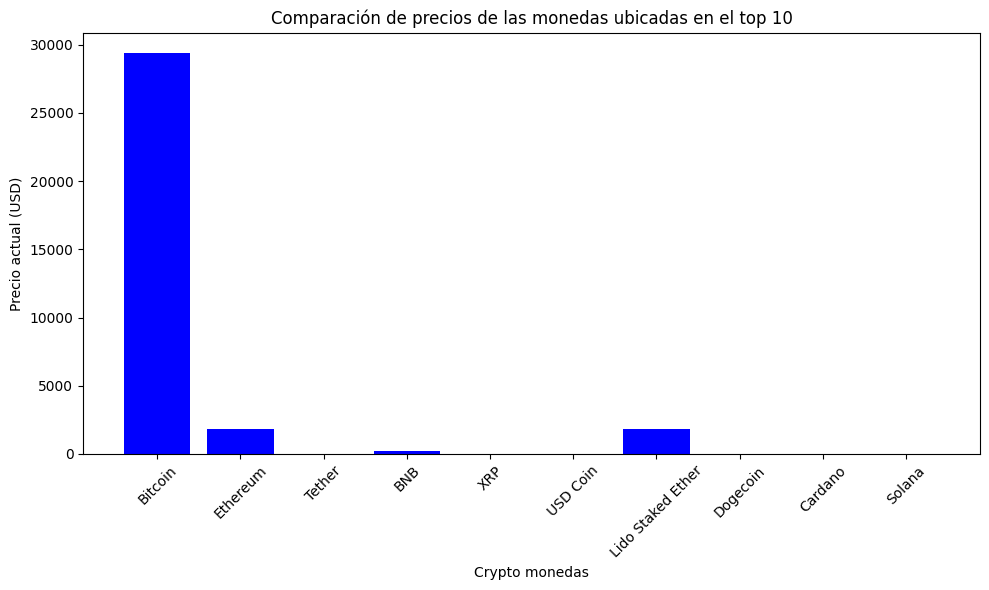

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_ten['name'], top_ten['current_price'], color='blue')
plt.xlabel('Crypto monedas')
plt.ylabel('Precio actual (USD)')
plt.title('Comparación de precios de las monedas ubicadas en el top 10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Outliers**

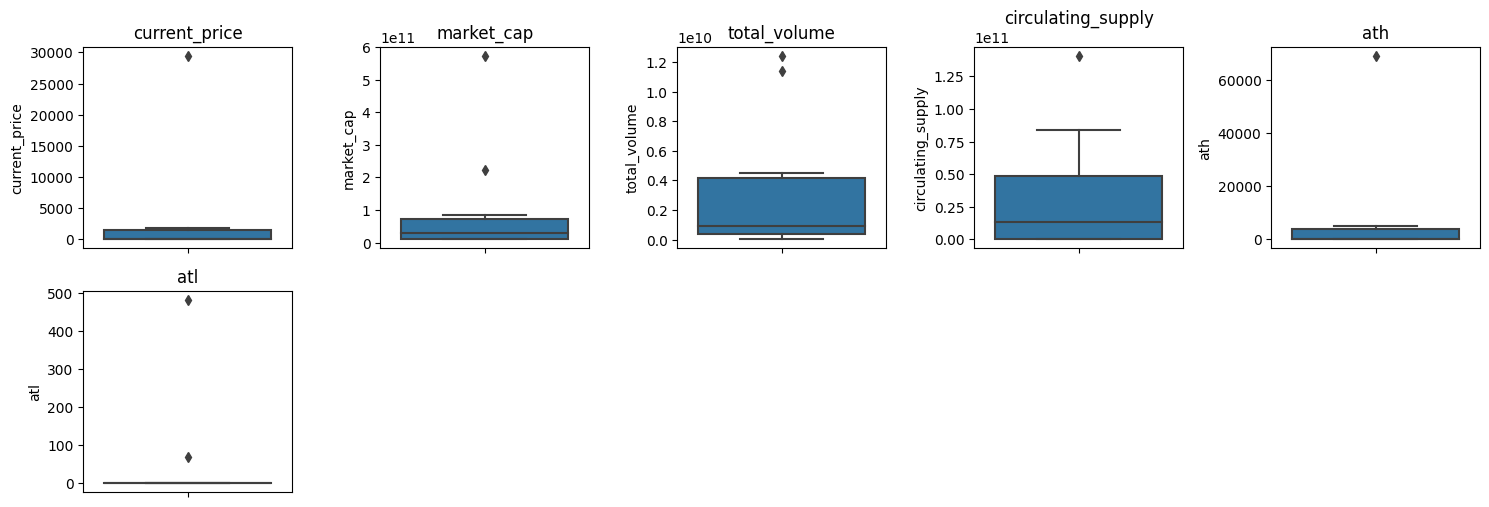

In [ ]:
import seaborn as sns


numerical_attributes = [
    "current_price",
    "market_cap",
    "total_volume",
    "circulating_supply",
    "ath",
    "atl"
]



# Box plots para cada atributo númerico
plt.figure(figsize=(15, 10))
for attribute in numerical_attributes:
    plt.subplot(4, 5, numerical_attributes.index(attribute) + 1)
    sns.boxplot(data=top_ten, y=attribute)
    plt.title(attribute)
    plt.tight_layout()

plt.show()

# **Identificar outliers por atributo calculando el IQR**

In [ ]:
ath = 'ath'

# Calculo de quartiles y de IQR
Q1 = top_ten[ath].quantile(0.25)
Q3 = top_ten[ath].quantile(0.75)
IQR = Q3 - Q1

# Definición de límites de outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar posibles outliers
ath_outliers = top_ten[(top_ten[ath] < lower_bound) | (top_ten[ath] > upper_bound)]

ath_outliers

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,last_updated,sparkline_in_7d
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,29395.0,572042278196,1,6.175228e+11,12397781655,29665.0,...,21000000.0,21000000.0,69045.0,-57.38273,2021-11-10T14:24:11.849Z,67.81,43293.93447,2013-07-06T00:00:00.000Z,2023-08-10T17:06:14.757Z,"{'price': [29107.671411490628, 29068.721666552..."


In [ ]:
total_volume = 'total_volume'


# Calculo de quartiles y de IQR
Q1 = top_ten[total_volume].quantile(0.25)
Q3 = top_ten[total_volume].quantile(0.75)
IQR = Q3 - Q1

# Definición de límites de outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar posibles outliers
total_volume_outliers = top_ten[(top_ten[total_volume] < lower_bound) | (top_ten[total_volume] > upper_bound)]

total_volume_outliers



,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,last_updated,sparkline_in_7d
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,29395.000000,572042278196,1,6.175228e+11,12397781655,29665.000,...,2.100000e+07,21000000.0,69045.00,-57.38273,2021-11-10T14:24:11.849Z,67.810000,43293.93447,2013-07-06T00:00:00.000Z,2023-08-10T17:06:14.757Z,"{'price': [29107.671411490628, 29068.721666552..."
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.998895,83467476037,3,8.346748e+10,11408577084,1.001,...,8.353293e+10,NaN,1.32,-24.47888,2018-07-24T00:00:00.000Z,0.572521,74.52922,2015-03-02T00:00:00.000Z,2023-08-10T17:05:00.593Z,"{'price': [0.9985973377492344, 0.9988236463582..."


In [71]:
atl = 'atl'


# Calculo de quartiles y de IQR
Q1 = top_ten[atl].quantile(0.25)
Q3 = top_ten[atl].quantile(0.75)
IQR = Q3 - Q1

# Definición de límites de outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar posibles outliers
atl_outliers = top_ten[(top_ten[atl] < lower_bound) | (top_ten[atl] > upper_bound)]

atl_outliers



,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,last_updated,sparkline_in_7d
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,29395.00,572042278196,1,6.175228e+11,12397781655,29665.00,...,2.100000e+07,2.100000e+07,69045.00,-57.38273,2021-11-10T14:24:11.849Z,67.81,43293.93447,2013-07-06T00:00:00.000Z,2023-08-10T17:06:14.757Z,"{'price': [29107.671411490628, 29068.721666552..."
6,staked-ether,steth,Lido Staked Ether,https://assets.coingecko.com/coins/images/1344...,1848.71,14858580701,7,1.485858e+10,25882129,1862.57,...,8.035959e+06,8.035959e+06,4829.57,-61.71489,2021-11-10T14:40:47.256Z,482.90,282.89933,2020-12-22T04:08:21.854Z,2023-08-10T17:06:13.431Z,"{'price': [1834.310586074048, 1831.74187811960..."


In [72]:
circulating_supply = 'circulating_supply'


# Calculo de quartiles y de IQR
Q1 = top_ten[circulating_supply].quantile(0.25)
Q3 = top_ten[circulating_supply].quantile(0.75)
IQR = Q3 - Q1

# Definición de límites de outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar posibles outliers
circulating_supply_outliers = top_ten[(top_ten[circulating_supply] < lower_bound) | (top_ten[circulating_supply] > upper_bound)]

circulating_supply_outliers

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,last_updated,sparkline_in_7d
7,dogecoin,doge,Dogecoin,https://assets.coingecko.com/coins/images/5/la...,0.076452,10763287574,8,1.076328e+10,447717324,0.076751,...,1.405349e+11,NaN,0.731578,-89.52554,2021-05-08T05:08:23.458Z,0.000087,88076.70429,2015-05-06T00:00:00.000Z,2023-08-10T17:06:20.880Z,"{'price': [0.07354484570972675, 0.073241393792..."


In [74]:
market_cap = 'market_cap'


# Calculo de quartiles y de IQR
Q1 = top_ten[market_cap].quantile(0.25)
Q3 = top_ten[market_cap].quantile(0.75)
IQR = Q3 - Q1

# Definición de límites de outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar posibles outliers
market_cap_outliers = top_ten[(top_ten[market_cap] < lower_bound) | (top_ten[market_cap] > upper_bound)]

market_cap_outliers

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,last_updated,sparkline_in_7d
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,29395.00,572042278196,1,6.175228e+11,12397781655,29665.00,...,2.100000e+07,21000000.0,69045.00,-57.38273,2021-11-10T14:24:11.849Z,67.810000,43293.93447,2013-07-06T00:00:00.000Z,2023-08-10T17:06:14.757Z,"{'price': [29107.671411490628, 29068.721666552..."
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1849.28,222283221202,2,2.222832e+11,4521458259,1862.32,...,1.201525e+08,NaN,4878.26,-62.06329,2021-11-10T14:24:19.604Z,0.432979,427323.06592,2015-10-20T00:00:00.000Z,2023-08-10T17:06:16.524Z,"{'price': [1835.434047268587, 1832.99564635555..."


In [75]:
current_price = 'current_price'


# Calculo de quartiles y de IQR
Q1 = top_ten[current_price].quantile(0.25)
Q3 = top_ten[current_price].quantile(0.75)
IQR = Q3 - Q1

# Definición de límites de outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar posibles outliers
current_price_outliers = top_ten[(top_ten[current_price] < lower_bound) | (top_ten[current_price] > upper_bound)]
current_price_outliers

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,last_updated,sparkline_in_7d
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,29395.0,572042278196,1,6.175228e+11,12397781655,29665.0,...,21000000.0,21000000.0,69045.0,-57.38273,2021-11-10T14:24:11.849Z,67.81,43293.93447,2013-07-06T00:00:00.000Z,2023-08-10T17:06:14.757Z,"{'price': [29107.671411490628, 29068.721666552..."


# **Line Chat para visualizar la data de sparkline. Mostrando el flujo del precio en los últimos 7 días para cada moneda del top 10.**

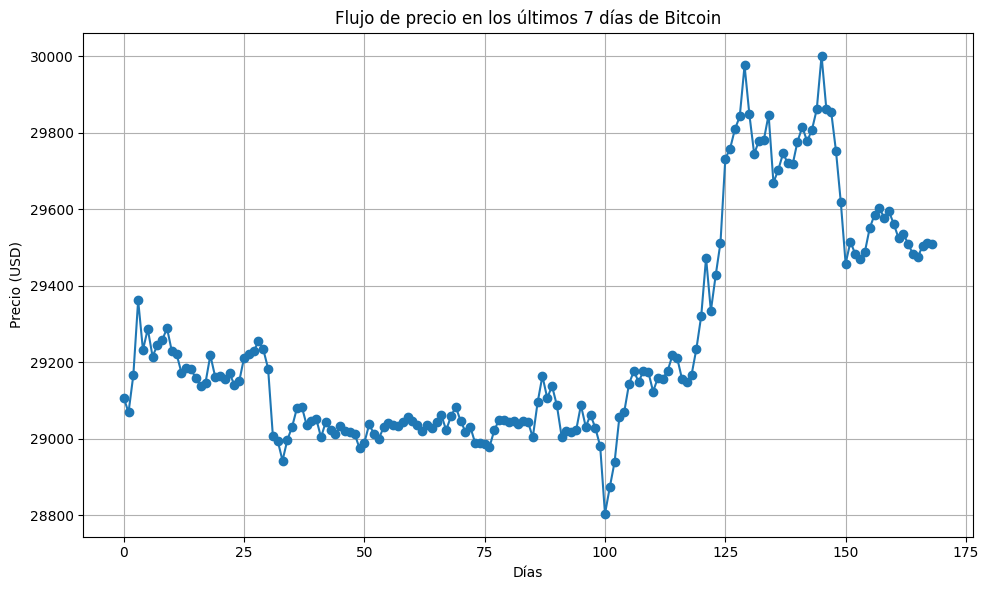

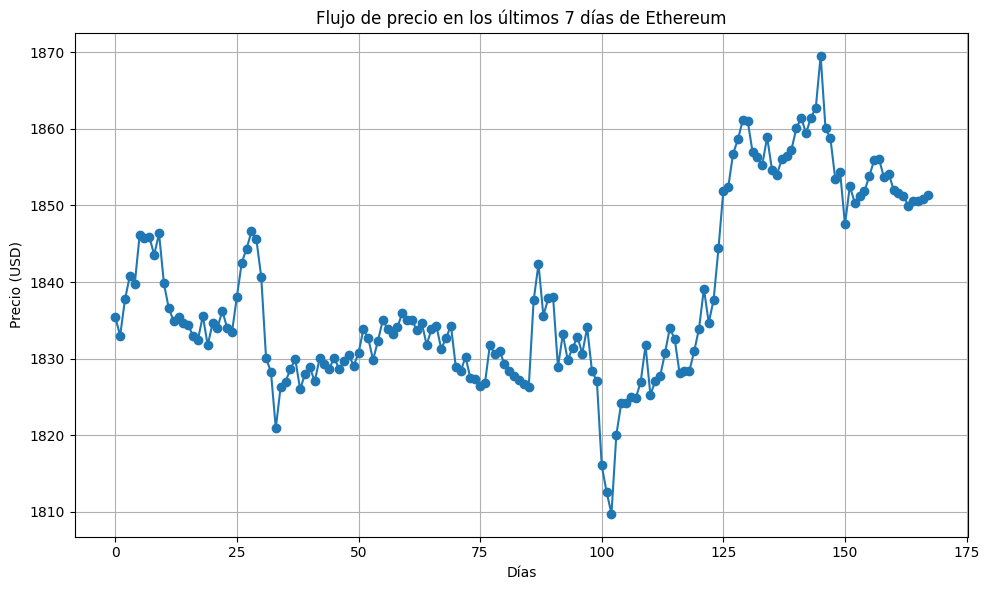

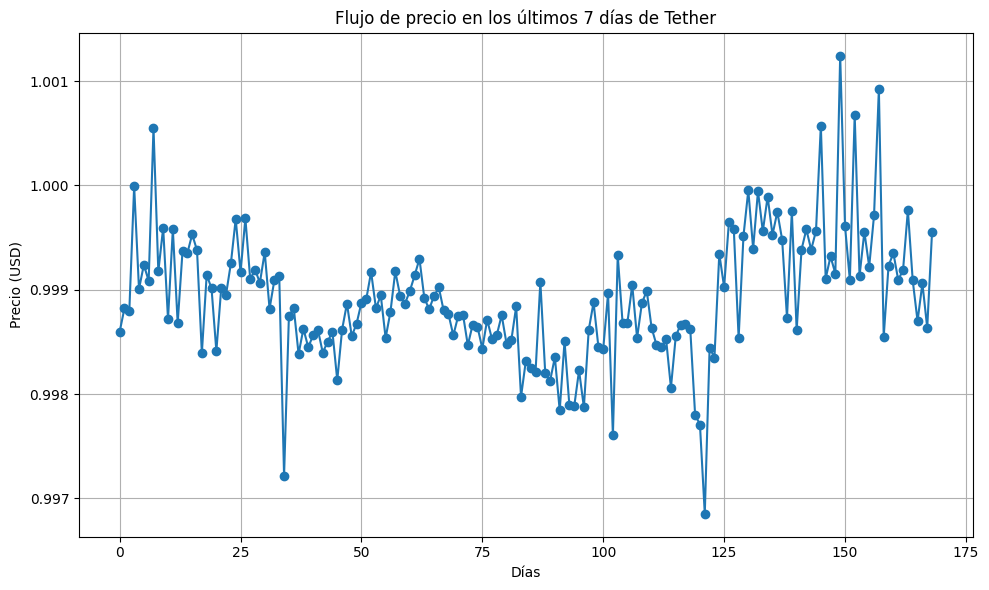

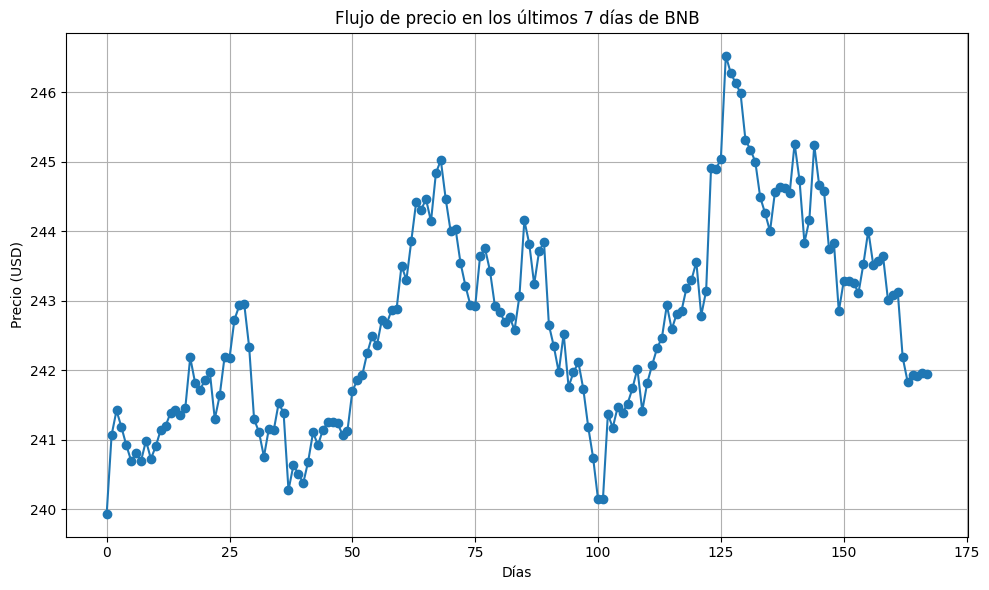

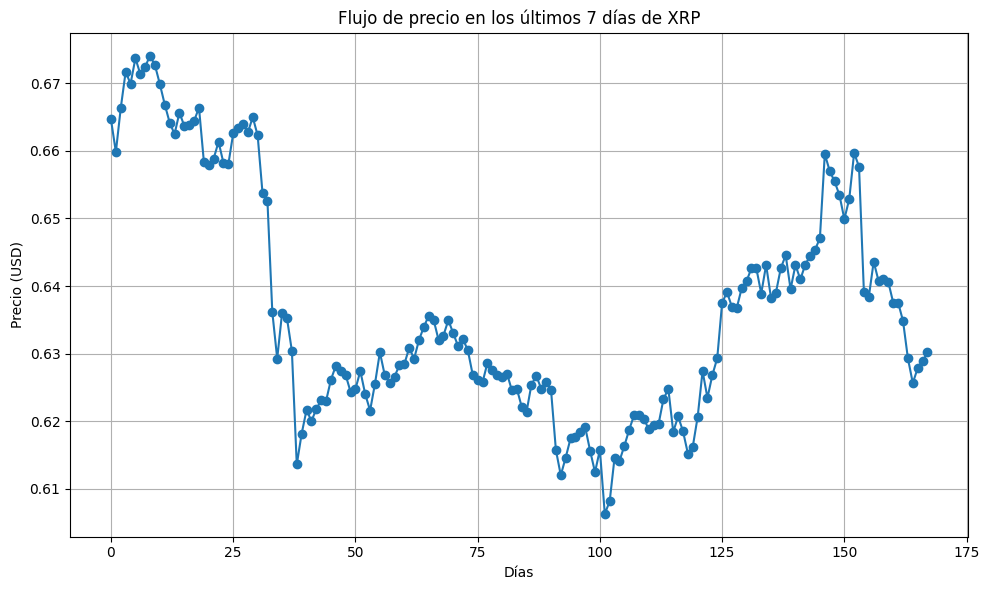

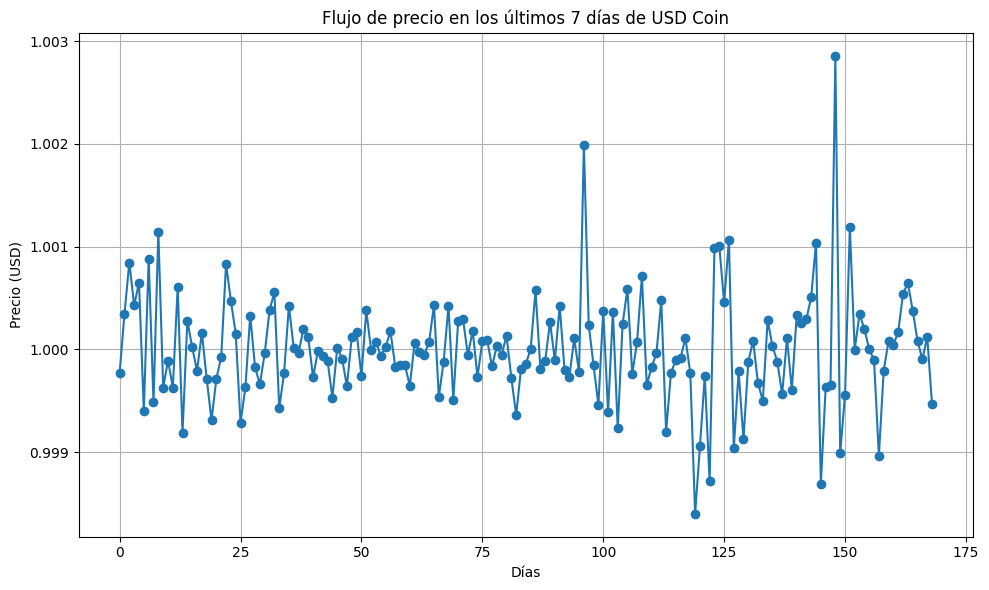

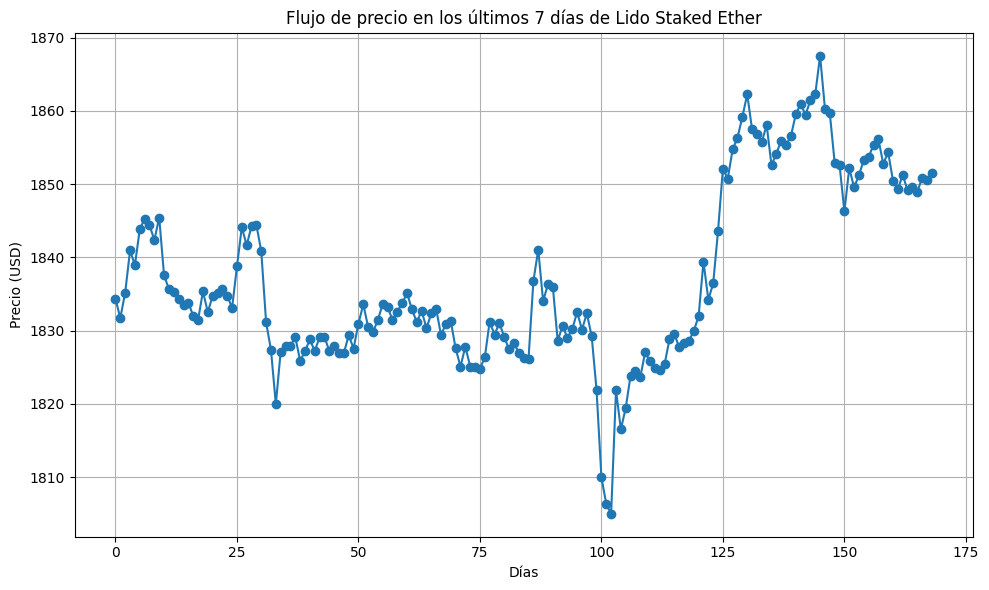

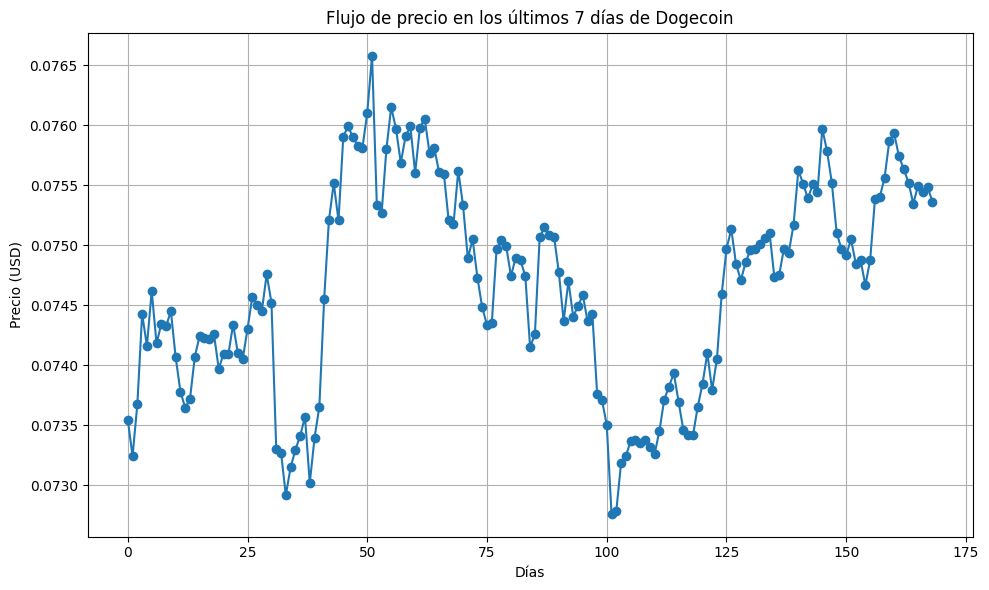

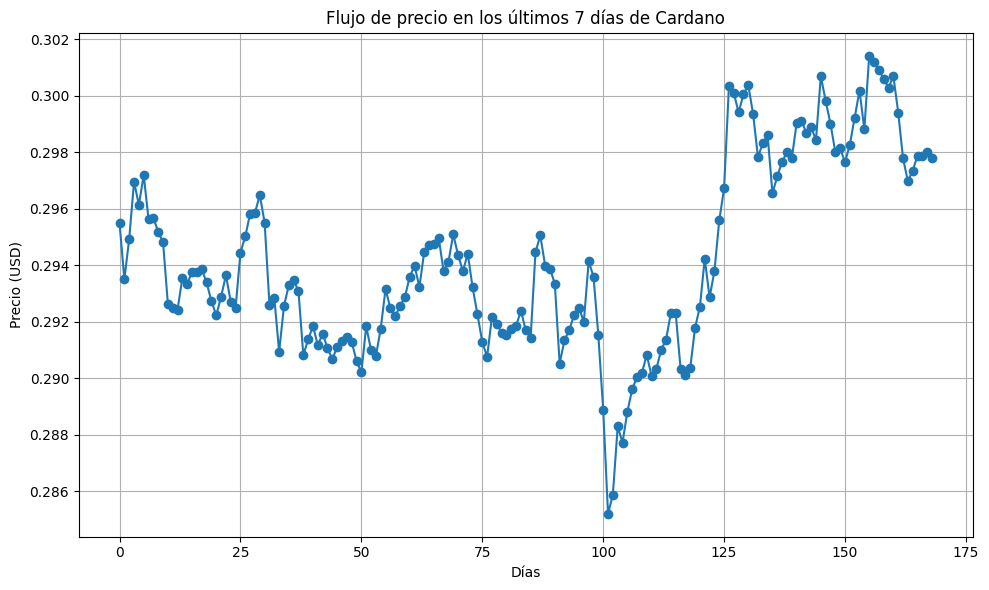

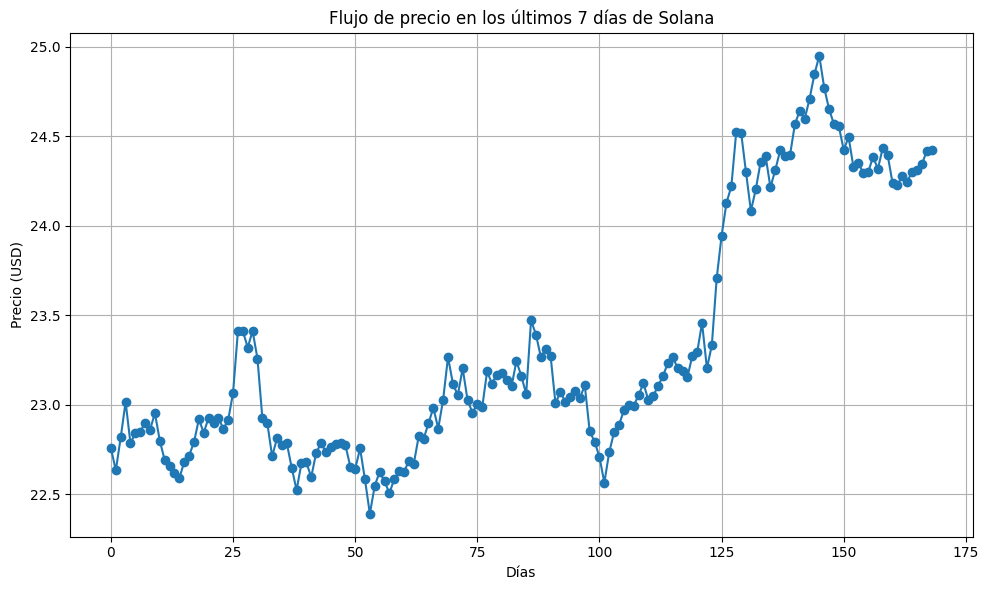

In [70]:
import ast

for index, row in top_ten.iterrows():
    coin_name = row['name']

    # Conversión de string a dictionary
    sparkline_data_dict = ast.literal_eval(row['sparkline_in_7d'])
    sparkline_data = sparkline_data_dict['price']

    # Line Chart para la data de Sparkline
    plt.figure(figsize=(10, 6))
    plt.plot(sparkline_data, marker='o')
    plt.xlabel('Días')
    plt.ylabel('Precio (USD)')
    plt.title(f'Flujo de precio en los últimos 7 días de {coin_name}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


**El último día, Bitcoin, que es la moneda con mayor valor, bajó levemente.**

# **Detalle y comparación entre precio actual, máximo valor alcanzado y mínimo valor alcanzado.**

Dogecoin es la moneda con el precio más bajo (al momento del análisis)

*   Valor actual: 0.076452
*   Valor alcanzado más bajo: 0.000087
*   Fecha de cuando se alcanzo valor más bajo: 2015-05-06
*   Valor alcanzado más alto: 0.731578
*   Fecha de cuando se alcanzo valor más alto: 2021-05-08


In [77]:
import matplotlib.pyplot as plt

dogecoin_row = top_ten[top_ten['name'] == 'Dogecoin']
dogecoin = dogecoin_row[['current_price', 'atl', 'atl_date', 'ath', 'ath_date']]

dogecoin


,current_price,atl,atl_date,ath,ath_date
7,0.076452,0.000087,2015-05-06T00:00:00.000Z,0.731578,2021-05-08T05:08:23.458Z


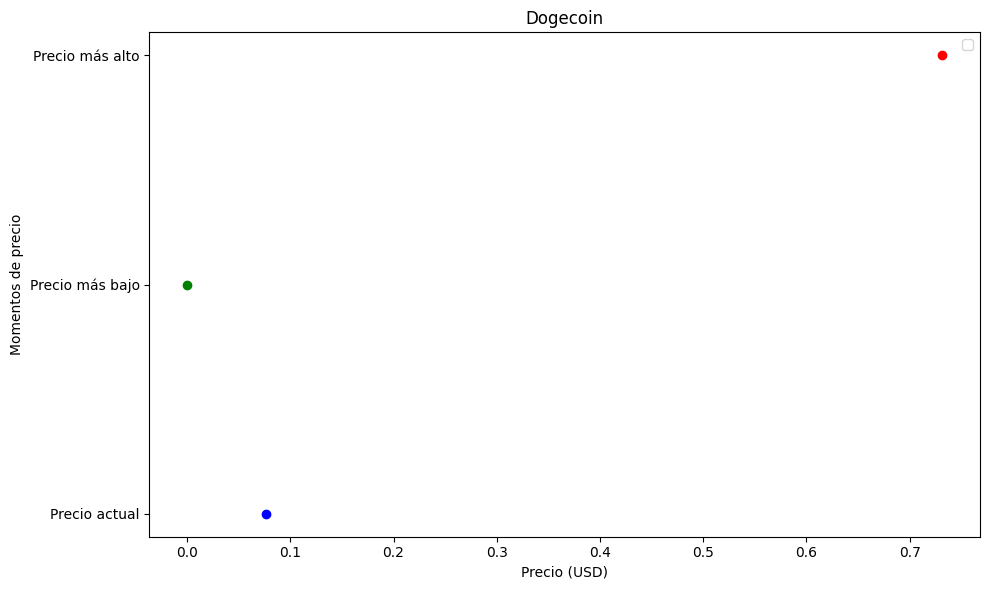

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(dogecoin['current_price'], ['Precio actual'], color='blue', marker='o')
plt.scatter(dogecoin['atl'], ['Precio más bajo'], color='green', marker='o')
plt.scatter(dogecoin['ath'], ['Precio más alto'], color='red', marker='o')

plt.xlabel('Precio (USD)')
plt.ylabel('Momentos de precio')
plt.title('Dogecoin')
plt.legend()

plt.tight_layout()
plt.show()

Bitcoin es la moneda con el precio más alto (al momento del análisis)

*   Valor actual: 29395.0.
*   Valor alcanzado más bajo: 67.81
*   Fecha de cuando se alcanzo valor más bajo: 2013-07-06
*   Valor alcanzado más alto: 69045.0
*   Fecha de cuando se alcanzo valor más alto: 2021-11-10



In [ ]:
bitcoin_row = df[df['name'] == 'Bitcoin']
bitcoin = bitcoin_row[['current_price', 'atl', 'atl_date', 'ath', 'ath_date']]

bitcoin

,current_price,atl,atl_date,ath,ath_date
0,29395.0,67.81,2013-07-06T00:00:00.000Z,69045.0,2021-11-10T14:24:11.849Z


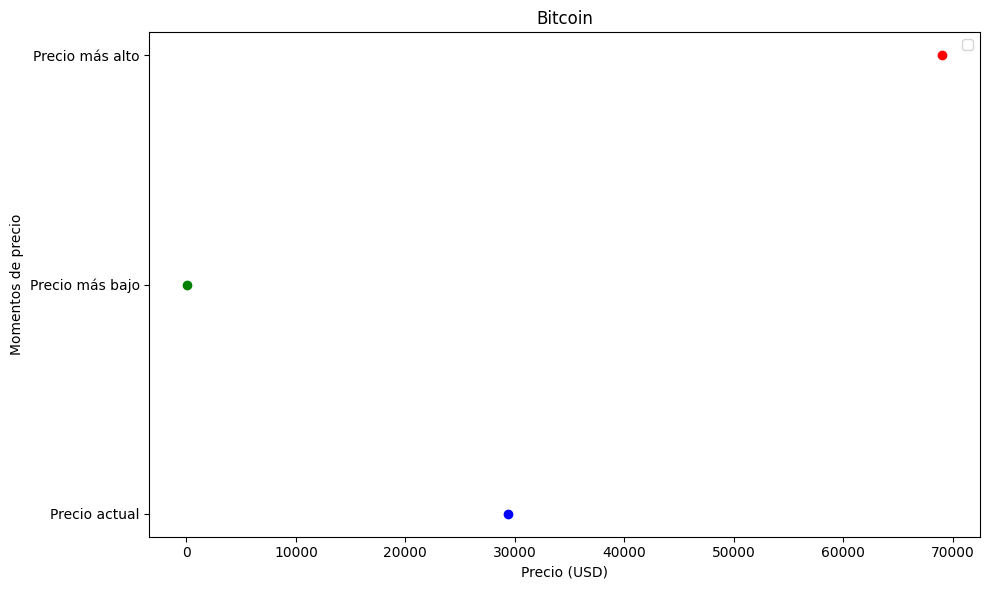

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(bitcoin['current_price'], ['Precio actual'], color='blue', marker='o')
plt.scatter(bitcoin['atl'], ['Precio más bajo'], color='green', marker='o')
plt.scatter(bitcoin['ath'], ['Precio más alto'], color='red', marker='o')

plt.xlabel('Precio (USD)')
plt.ylabel('Momentos de precio')
plt.title('Bitcoin')
plt.legend()

plt.tight_layout()
plt.show()

Ethereum es la segunda moneda con el precio más alto (al momento del análisis)

*   Valor actual: 1849.28
*   Valor alcanzado más bajo: 0.432979
*   Fecha de cuando se alcanzo valor más bajo: 2015-10-20
*   Valor alcanzado más alto: 4878.26
*   Fecha de cuando se alcanzo valor más alto: 2021-11-10

In [ ]:
ethereum_rows = df[df['name'] == 'Ethereum']
ethereum = ethereum_rows[['current_price', 'atl', 'atl_date', 'ath', 'ath_date']]

ethereum


,current_price,atl,atl_date,ath,ath_date
1,1849.28,0.432979,2015-10-20T00:00:00.000Z,4878.26,2021-11-10T14:24:19.604Z


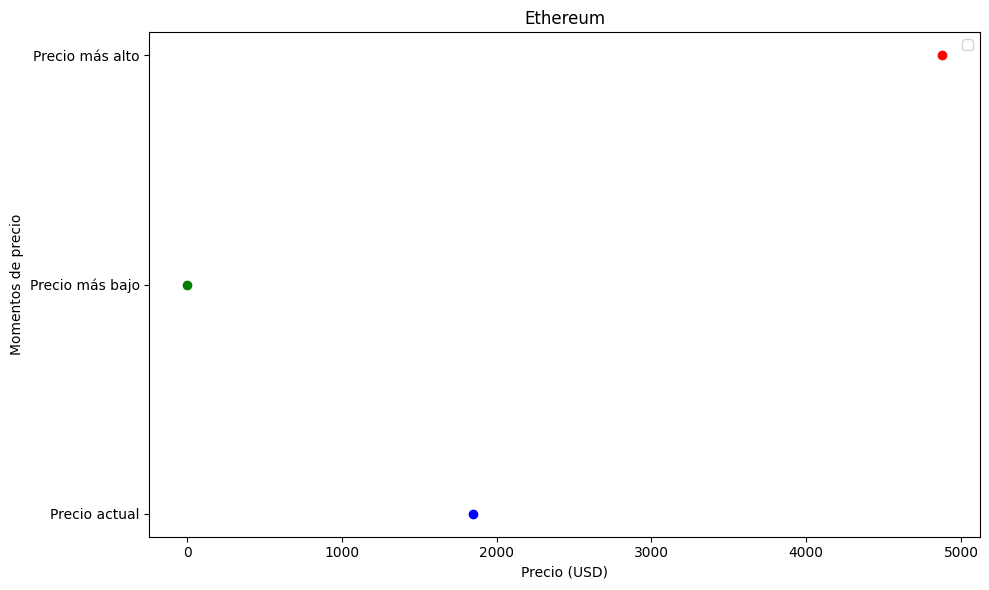

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(ethereum['current_price'], ['Precio actual'], color='blue', marker='o')
plt.scatter(ethereum['atl'], ['Precio más bajo'], color='green', marker='o')
plt.scatter(ethereum['ath'], ['Precio más alto'], color='red', marker='o')

plt.xlabel('Precio (USD)')
plt.ylabel('Momentos de precio')
plt.title('Ethereum')
plt.legend()

plt.tight_layout()
plt.show()

USD Coin es la sexta moneda con el precio más alto (al momento del análisis)

*   Valor actual: 0.999786
*   Valor alcanzado más bajo: 0.877647
*   Fecha de cuando se alcanzo valor más bajo: 2023-03-11
*   Valor alcanzado más alto: 1.17
*   Fecha de cuando se alcanzo valor más alto: 2019-05-08

In [ ]:
usd_coin_row = df[df['name'] == 'USD Coin']
usd_coin = usd_coin_row[['current_price', 'atl', 'atl_date', 'ath', 'ath_date']]

usd_coin

,current_price,atl,atl_date,ath,ath_date
5,0.999786,0.877647,2023-03-11T08:02:13.981Z,1.17,2019-05-08T00:40:28.300Z


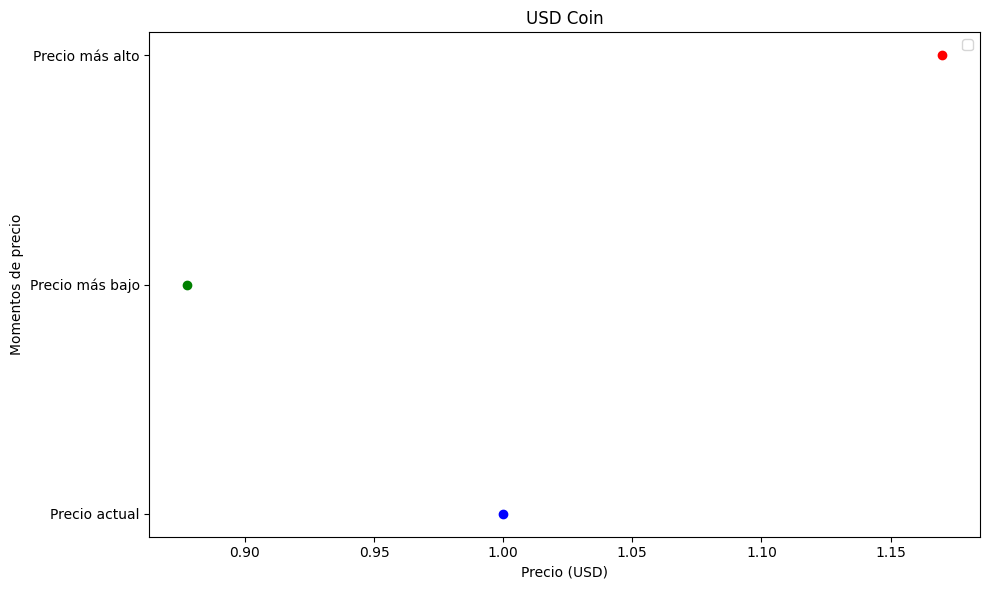

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(usd_coin['current_price'], ['Precio actual'], color='blue', marker='o')
plt.scatter(usd_coin['atl'], ['Precio más bajo'], color='green', marker='o')
plt.scatter(usd_coin['ath'], ['Precio más alto'], color='red', marker='o')

plt.xlabel('Precio (USD)')
plt.ylabel('Momentos de precio')
plt.title('USD Coin')
plt.legend()

plt.tight_layout()
plt.show()